In [1]:
#importing libraries
import numpy as np
import cv2 as cv
import csv
from google.colab.patches import cv2_imshow

In [7]:
# Open file
z_value=np.zeros((9))
with open('z-dimension.csv') as file_obj:
    heading = next(file_obj)
    reader_obj = csv.reader(file_obj)
    for i,row  in zip(range(10),reader_obj):
      z_value[i]=(int(row[1]))

     
for n in range(9):
  img=cv.imread('c'+str(n+1)+'.png')
  # cv2_imshow(img)
  corner_points=np.zeros((6,9,2))
  img=img.astype(np.float32)
  row=0
  col=0
  for i in range(1023):
    for j in range(1023):
      if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
        corner_points[row][col]=np.array([i,j])
        if(col<8):
          col=col+1
        else:
          row=row+1
          col=0
  # print(corner_points)
  real_points=np.zeros((6,4))
  img_points=np.zeros((6,2))

  real_points[0]=np.array([100,75,z_value[n],1])
  real_points[1]=np.array([100,150,z_value[n],1])
  real_points[2]=np.array([75,100,z_value[n],1])
  real_points[3]=np.array([125,100,z_value[n],1])
  real_points[4]=np.array([75,125,z_value[n],1])
  real_points[5]=np.array([125,125,z_value[n],1])

  img_points[0]=np.array(corner_points[3][2])
  img_points[1]=np.array(corner_points[3][5])
  img_points[2]=np.array(corner_points[2][3])
  img_points[3]=np.array(corner_points[4][3])
  img_points[4]=np.array(corner_points[2][4])
  img_points[5]=np.array(corner_points[4][4])

  A=np.zeros((12,12))
  for i in range(12):
    for j in range(12):
      if(i%2==0):
        if(j<4):
          A[i][j]=real_points[i//2][j]
        elif(j<8):
          A[i][j]=0
        else:
          A[i][j]=-(img_points[i//2][0])*real_points[i//2][j%4]
      else:
        if(j<4):
          A[i][j]=0
        elif(j<8):
          A[i][j]=real_points[i//2][j%4]
        else:
          A[i][j]=-(img_points[i//2][1])*real_points[i//2][j%4]

  # Compute the factor by Singular Value Decomposition
  U, s, V = np.linalg.svd(A)
    
  # Print the result
  print("\nCamera Matrix using SVD method for C"+str(n+1)+" :")
  V=np.transpose(V)
  print((V[:][11]).reshape(3,4))

  # finding eigenvalues and eigenvectors
  eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
  eig_min=abs(eig_vals[0])
  min_idx=0
  # print("Print Eigen values:\n")
  # print(eig_vals)
  # print(eig_vectors)
  for i in range(1,12):
    if(eig_min>abs(eig_vals[i])):
      eig_min=abs(eig_vals[i])
      min_idx=i
  # printing eigen vector corresponding to minimum eigen value
  print("\nCamera matrix using Eigenvector for C"+str(n+1)+" :")
  print(eig_vectors[:][min_idx].reshape((3,4)))     
  


Camera Matrix using SVD method for C1 :
[[ 2.32989073e-03 -4.94866300e-04 -7.59368829e-04  4.29756172e-07]
 [ 5.31906949e-06  3.26311484e-07  2.04296851e-06  1.44451482e-06]
 [ 1.26569056e-06  4.06122326e-04  9.99013092e-01 -4.43444096e-02]]

Camera matrix using Eigenvector for C1 :
[[-2.32989073e-03  4.94866300e-04  7.59368829e-04  4.29756148e-07]
 [ 5.31906589e-06  3.26332188e-07 -2.04472839e-06 -1.44401351e-06]
 [-1.27216683e-06 -1.04840337e-02  9.99996714e-01 -1.28169073e-03]]

Camera Matrix using SVD method for C2 :
[[ 1.91073509e-03 -3.63305247e-04 -4.65902527e-04  2.25760069e-07]
 [-3.89870124e-06 -2.75781640e-07  1.51808506e-06  9.97313507e-07]
 [-9.51453074e-07 -3.81409652e-02 -9.99190618e-01 -1.26244195e-02]]

Camera matrix using Eigenvector for C2 :
[[-1.91073509e-03  3.63305247e-04  4.65902527e-04 -2.25760089e-07]
 [-3.89870660e-06  2.75748791e-07  1.51412375e-06  9.98781372e-07]
 [-9.47740913e-07  2.26501417e-03 -9.99980938e-01 -2.58008438e-02]]

Camera Matrix using SVD m

#ROUGH WORK

#1st Image

gray - 70,71
white- 207,208,209
black- 7,8,9
finding internal corners

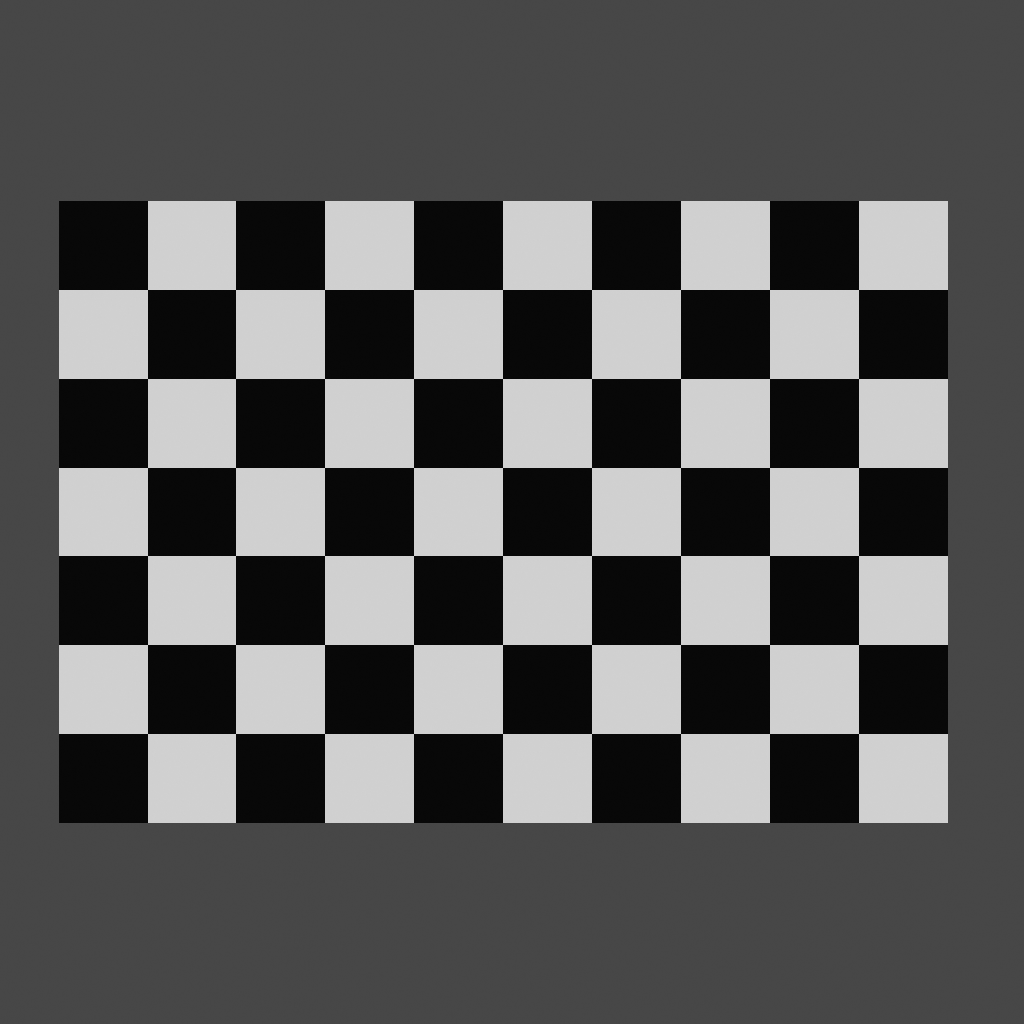

289 147
289 235
289 324
289 413
289 502
289 591
289 680
289 769
289 858
378 147
378 235
378 324
378 413
378 502
378 591
378 680
378 769
378 858
467 147
467 235
467 324
467 413
467 502
467 591
467 680
467 769
467 858
555 147
555 235
555 324
555 413
555 502
555 591
555 680
555 769
555 858
644 147
644 235
644 324
644 413
644 502
644 591
644 680
644 769
644 858
733 147
733 235
733 324
733 413
733 502
733 591
733 680
733 769
733 858
Printing camera matrix:
 [[ 1.40560354e-01  9.87907084e-01 -6.53719617e-02  2.05410350e-03]
 [ 1.49180460e-03  1.21522328e-04  1.54813993e-03  1.76263055e-04]
 [-3.37064878e-06 -1.81604372e-12  2.49440675e-14 -3.59702423e-15]]


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c1.png')
cv2_imshow(img)
img=img.astype(np.float32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)
    A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]
        
# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

In [ ]:
#6 points considered are
# (289 147)
# (378 235)
# (467 324)
# (555 413)
# (644 502)
# (733 591)
# constructing A matrix (12 x 12) matrix
# z value  = 400
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),400,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([289,147])
img_points[1]=np.array([378,235])
img_points[2]=np.array([467,324])
img_points[3]=np.array([555,413])
img_points[4]=np.array([644,502])
img_points[5]=np.array([733,591])


289 147 (0,0)
289 235
289 324
289 413
289 502
289 591
289 680
289 769
289 858
378 147
378 235 (1,1)
378 324
378 413
378 502
378 591
378 680
378 769
378 858
467 147
467 235
467 324 (2,2)
467 413
467 502
467 591
467 680
467 769
467 858
555 147
555 235
555 324
555 413 (3,3)
555 502
555 591
555 680
555 769
555 858
644 147
644 235
644 324
644 413
644 502 
644 591
644 680
644 769
644 858
733 147
733 235
733 324
733 413
733 502
733 591 
733 680
733 769
733 858
A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]
        
# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))


Printing camera matrix:
 [[-7.63276131e-04+0.00000000e+00j -1.89971389e-03+0.00000000e+00j
  -7.82043764e-01+0.00000000e+00j -5.27814407e-01+0.00000000e+00j]
 [ 3.28877050e-01+0.00000000e+00j  4.06072262e-02+0.00000000e+00j
   5.74588979e-07+0.00000000e+00j -1.08183563e-05-4.62727983e-06j]
 [-1.08183563e-05+4.62727983e-06j  2.49958979e-03+0.00000000e+00j
   2.23540018e-04+0.00000000e+00j  2.69981809e-18+0.00000000e+00j]]



Factor of the given array  by Singular Value Decomposition:
[ 0.00000000e+00  6.75811103e-17  5.22069813e-17 -9.03145971e-17
 -1.04755127e-15  1.07797026e-15  4.63988557e-18  9.61752682e-19
  7.07106781e-01 -7.07106781e-01 -1.90839275e-17 -1.13704667e-16]


# 2nd image

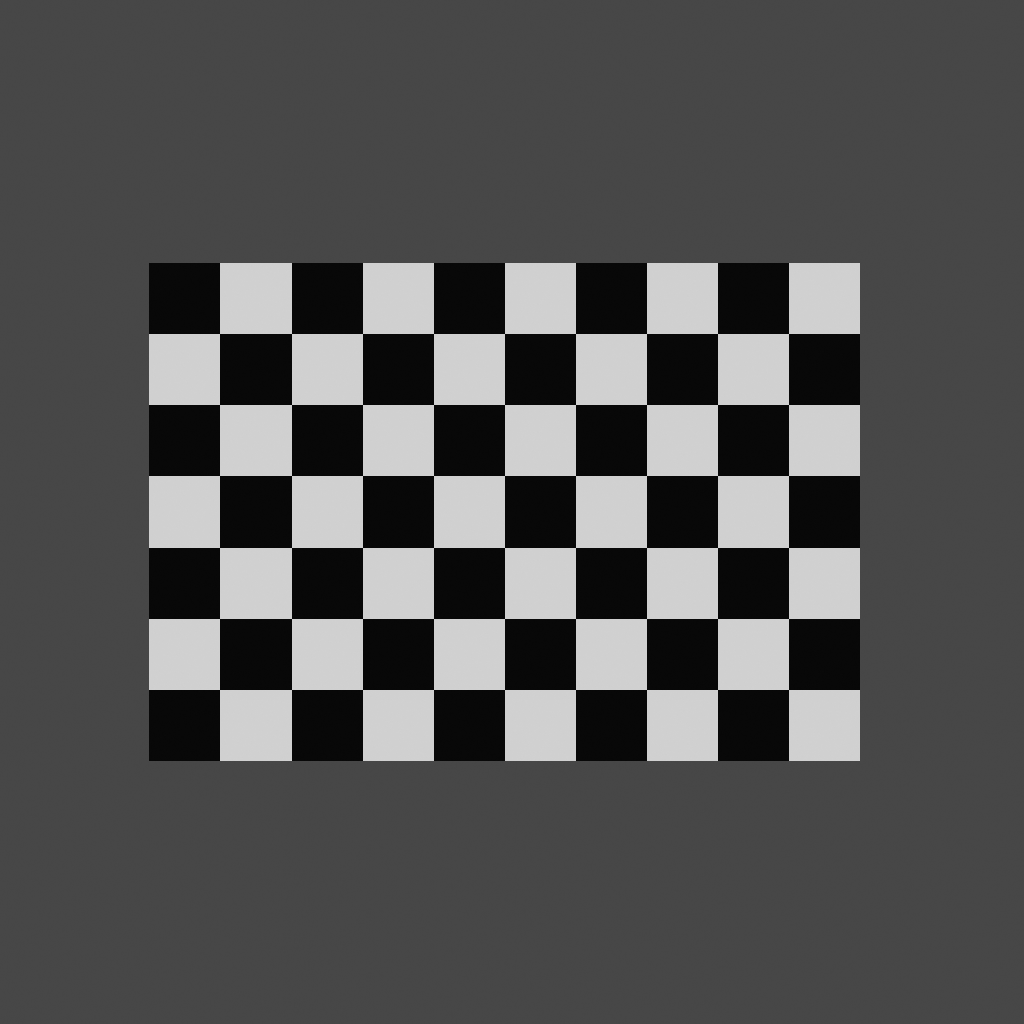

333 219
333 291
333 362
333 433
333 504
333 575
333 646
333 717
333 788
404 219
404 291
404 362
404 433
404 504
404 575
404 646
404 717
404 788
475 219
475 291
475 362
475 433
475 504
475 575
475 646
475 717
475 788
547 219
547 291
547 362
547 433
547 504
547 575
547 646
547 717
547 788
618 219
618 291
618 362
618 433
618 504
618 575
618 646
618 717
618 788
689 219
689 291
689 362
689 433
689 504
689 575
689 646
689 717
689 788


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c2.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)


In [ ]:
#6 points considered are
# (333 219)
# (404 291)
# (475 362)
# (547 433)
# (618 504)
# (689 575)
#constructing A matrix (12 x 12) matrix
#z value  = 500
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),500,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([333,219])
img_points[1]=np.array([404,291])
img_points[2]=np.array([475,362])
img_points[3]=np.array([547,433])
img_points[4]=np.array([618,504])
img_points[5]=np.array([689,575])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]
        
# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

Printing camera matrix:
 [[-8.40593220e-04+0.00000000e+00j -2.04022792e-03+0.00000000e+00j
  -7.70276589e-01+0.00000000e+00j -4.04227063e-01+0.00000000e+00j]
 [ 4.82763013e-01+0.00000000e+00j  1.01022088e-01+0.00000000e+00j
  -1.36149409e-06+0.00000000e+00j -1.10656750e-06+0.00000000e+00j]
 [-1.72778720e-03-1.56681792e-10j -1.72778720e-03+1.56681792e-10j
  -2.60553550e-04+0.00000000e+00j -2.19816066e-17+0.00000000e+00j]]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A, full_matrices=False)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])

# Factor of the given array  by Singular Value Decomposition:
# [ 0.00000000e+00  6.75811103e-17  5.22069813e-17 -9.03145971e-17
#  -1.04755127e-15  1.07797026e-15  4.63988557e-18  9.61752682e-19
#   7.07106781e-01 -7.07106781e-01 -1.90839275e-17 -1.13704667e-16]


Factor of the given array  by Singular Value Decomposition:
[ 0.00000000e+00  6.30242182e-18 -2.45531250e-18 -3.98501609e-17
  2.45185037e-15 -2.46118733e-15 -2.16330466e-17 -7.81750112e-15
  7.07106781e-01 -7.07106781e-01  5.69564942e-19  3.47946739e-17]


#3rd Image

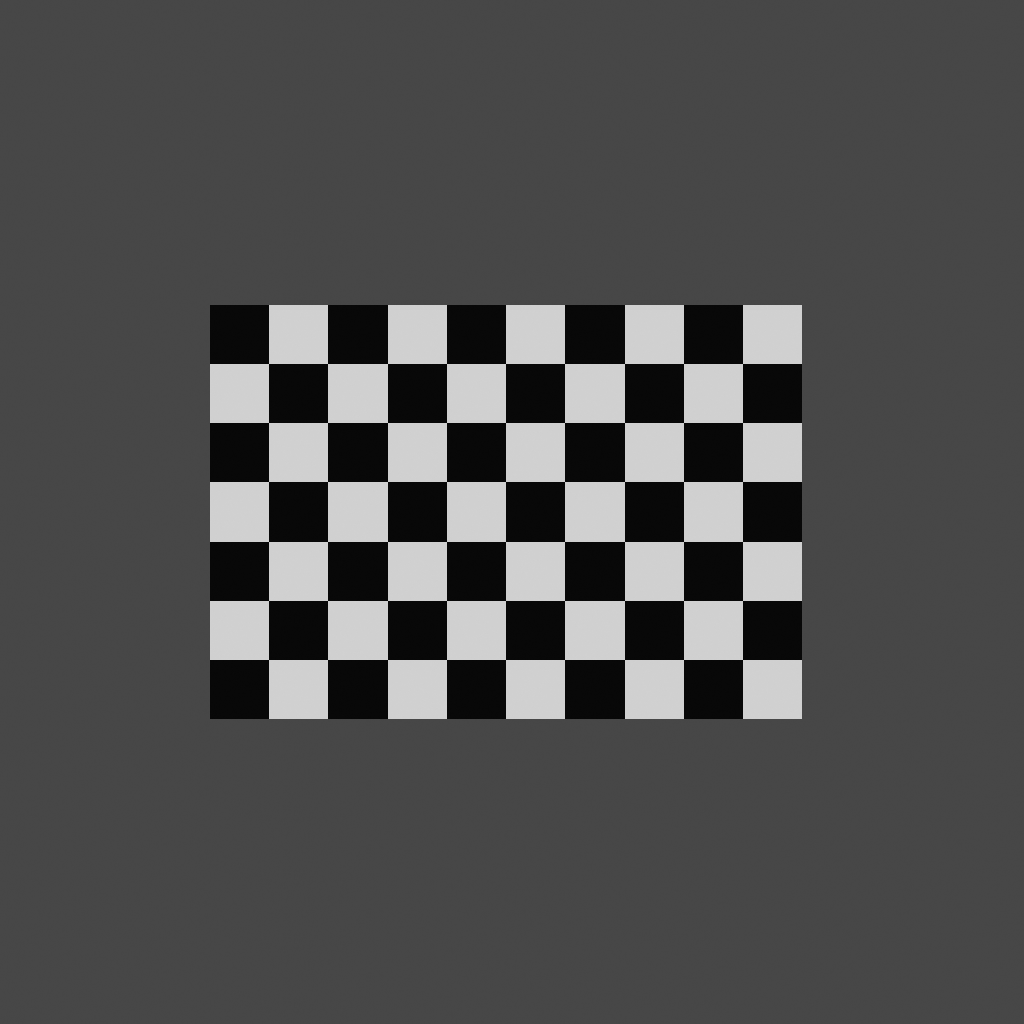

363 268
363 327
363 387
363 446
363 505
363 564
363 624
363 683
363 742
422 268
422 327
422 387
422 446
422 505
422 564
422 624
422 683
422 742
481 268
481 327
481 387
481 446
481 505
481 564
481 624
481 683
481 742
541 268
541 327
541 387
541 446
541 505
541 564
541 624
541 683
541 742
600 268
600 327
600 387
600 446
600 505
600 564
600 624
600 683
600 742
659 268
659 327
659 387
659 446
659 505
659 564
659 624
659 683
659 742


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c3.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)

In [ ]:
#6 points considered are
# (363 268)
# (422 327)
# (481 387)
# (541 446)
# (600 505)
# (659 564)
#constructing A matrix (12 x 12) matrix
#z value  = 600
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),600,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([363,268])
img_points[1]=np.array([422,327])
img_points[2]=np.array([481,387])
img_points[3]=np.array([541,446])
img_points[4]=np.array([600,505])
img_points[5]=np.array([659,564])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]

# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

Printing camera matrix:
 [[-8.84232556e-04 -2.06190922e-03  7.61774397e-01  3.21627436e-01]
 [ 5.44384515e-01  1.41043433e-01 -8.19755604e-07  7.61200405e-06]
 [-5.25157425e-04 -1.35854741e-03 -5.46426820e-04 -3.75432405e-17]]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A, full_matrices=False)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])


Factor of the given array  by Singular Value Decomposition:
[ 0.00000000e+00 -1.41246734e-17  4.19296400e-18  2.79284716e-17
 -3.78051789e-17  4.10929130e-17  1.63856802e-17  2.25484311e-16
 -7.07106781e-01  7.07106781e-01 -9.93249969e-19  3.73476347e-19]


#4th Image

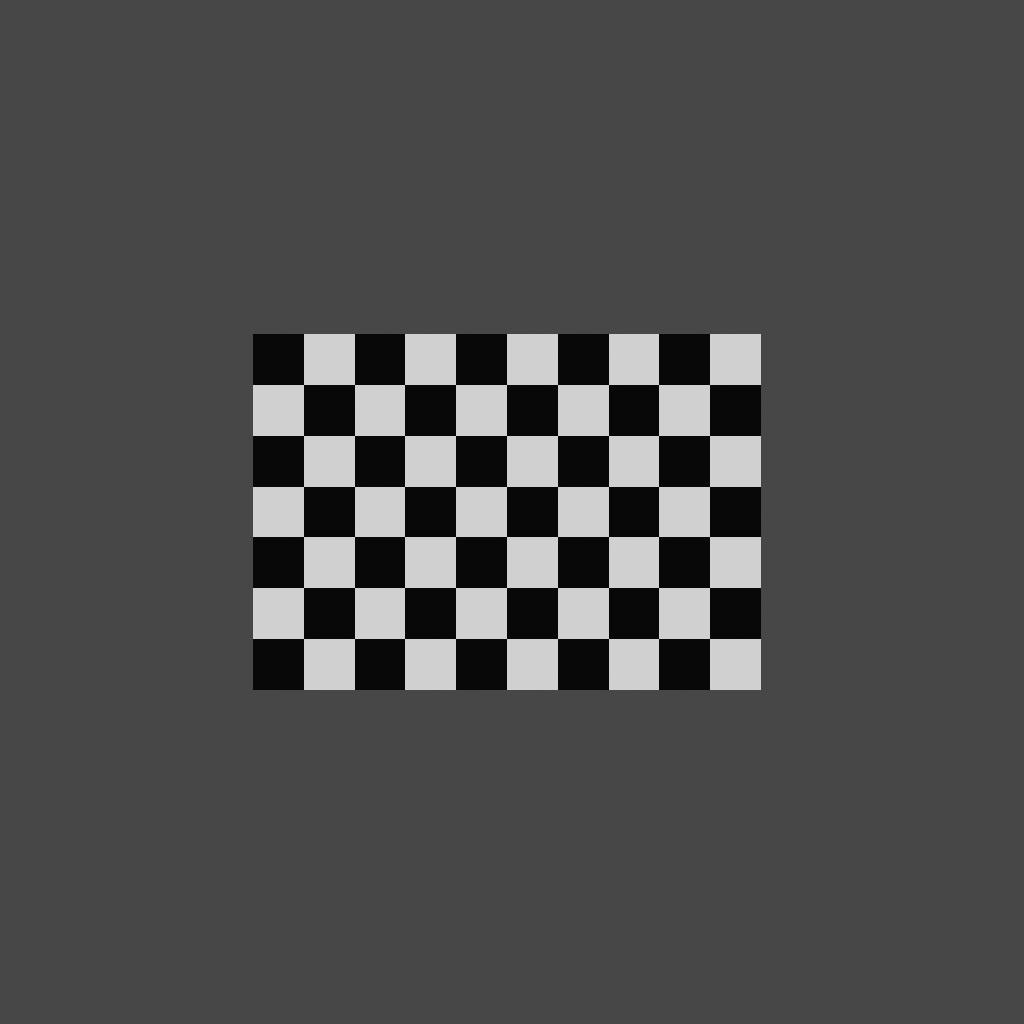

384 303
384 354
384 404
384 455
384 506
384 557
384 608
384 658
384 709
435 303
435 354
435 404
435 455
435 506
435 557
435 608
435 658
435 709
486 303
486 354
486 404
486 455
486 506
486 557
486 608
486 658
486 709
536 303
536 354
536 404
536 455
536 506
536 557
536 608
536 658
536 709
587 303
587 354
587 404
587 455
587 506
587 557
587 608
587 658
587 709
638 303
638 354
638 404
638 455
638 506
638 557
638 608
638 658
638 709


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c4.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)

In [ ]:
#6 points considered are
# (384 303)
# (435 354)
# (486 404)
# (536 455)
# (587 506)
# (638 557)
#constructing A matrix (12 x 12) matrix
#z value  = 700
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),700,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([363,268])
img_points[1]=np.array([422,327])
img_points[2]=np.array([481,387])
img_points[3]=np.array([541,446])
img_points[4]=np.array([600,505])
img_points[5]=np.array([659,564])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]

# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A, full_matrices=False)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])



Factor of the given array  by Singular Value Decomposition:
[-1.79651470e-06  1.79651470e-06  1.57191285e-05 -1.10033899e-02
 -4.25822638e-01  4.25822638e-01  9.01945235e-04 -6.31361665e-01
 -3.45403435e-01  3.45403435e-01 -2.73178826e-06  1.91225178e-03]


#5th Image

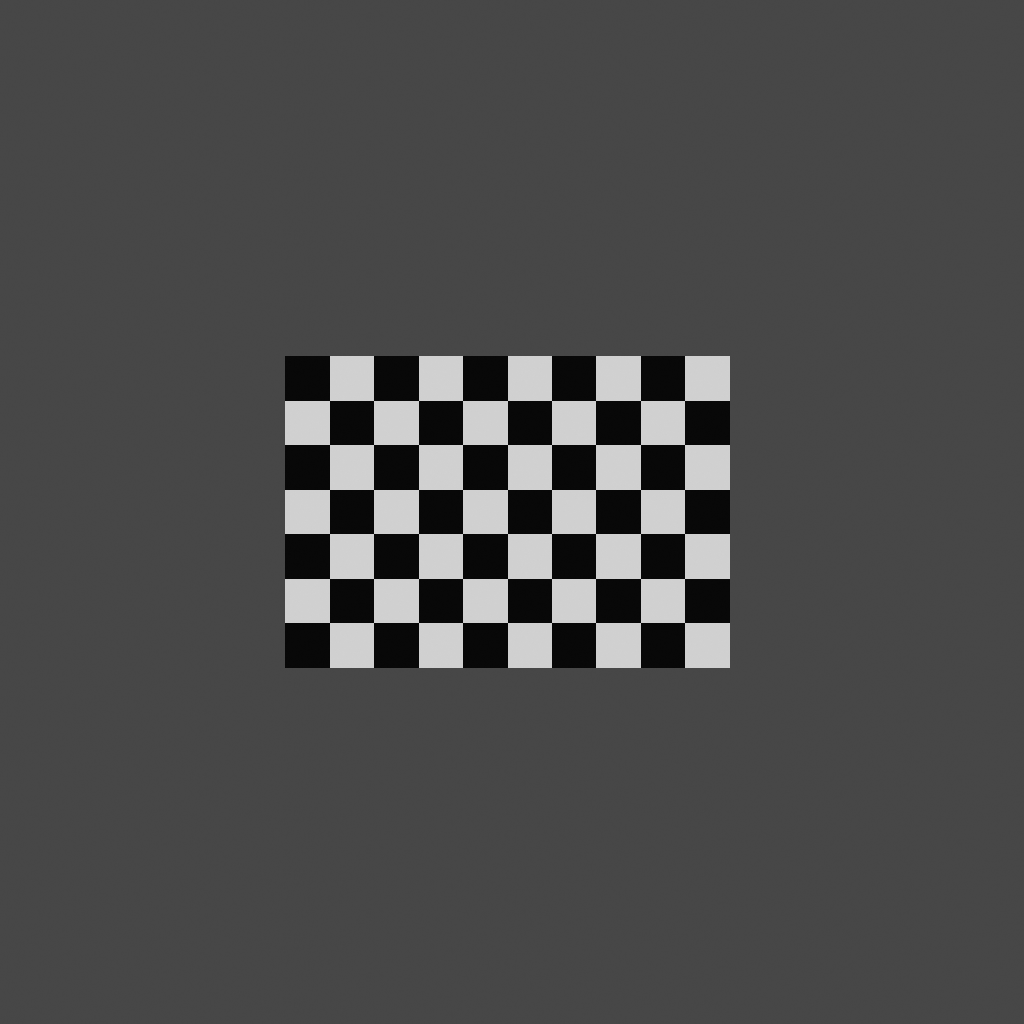

400 329
400 373
400 418
400 462
400 507
400 551
400 595
400 640
400 684
444 329
444 373
444 418
444 462
444 507
444 551
444 595
444 640
444 684
489 329
489 373
489 418
489 462
489 507
489 551
489 595
489 640
489 684
533 329
533 373
533 418
533 462
533 507
533 551
533 595
533 640
533 684
578 329
578 373
578 418
578 462
578 507
578 551
578 595
578 640
578 684
622 329
622 373
622 418
622 462
622 507
622 551
622 595
622 640
622 684


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c5.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)

In [ ]:
#6 points considered are
# (400 329)
# (444 373)
# (489 418)
# (533 462)
# (578 507)
# (622 551)
#constructing A matrix (12 x 12) matrix
#z value  = 800
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),800,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([400,329])
img_points[1]=np.array([444,373])
img_points[2]=np.array([489,418])
img_points[3]=np.array([533,462])
img_points[4]=np.array([578,507])
img_points[5]=np.array([622,551])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]

# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

Printing camera matrix:
 [[-1.15908753e-06 -2.56917944e-06  9.37393675e-04  2.85654604e-04]
 [ 7.38653810e-04 -2.37854441e-04 -2.41117332e-05  2.82024029e-04]
 [ 9.09520992e-01 -9.99949157e-01  9.99979571e-01  2.44328003e-13]]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A, full_matrices=False)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])


Factor of the given array  by Singular Value Decomposition:
[-4.52818782e-06  4.52818782e-06 -4.34566131e-07  3.47652904e-04
  2.96468572e-01 -2.96468572e-01  6.54185640e-04 -5.23348512e-01
 -5.24550175e-01  5.24550175e-01  4.46944061e-06 -3.57555249e-03]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])


Factor of the given array  by Singular Value Decomposition:
[-4.52818782e-06  4.52818782e-06 -4.34566131e-07  3.47652904e-04
  2.96468572e-01 -2.96468572e-01  6.54185640e-04 -5.23348512e-01
 -5.24550175e-01  5.24550175e-01  4.46944061e-06 -3.57555249e-03]


#6th Image

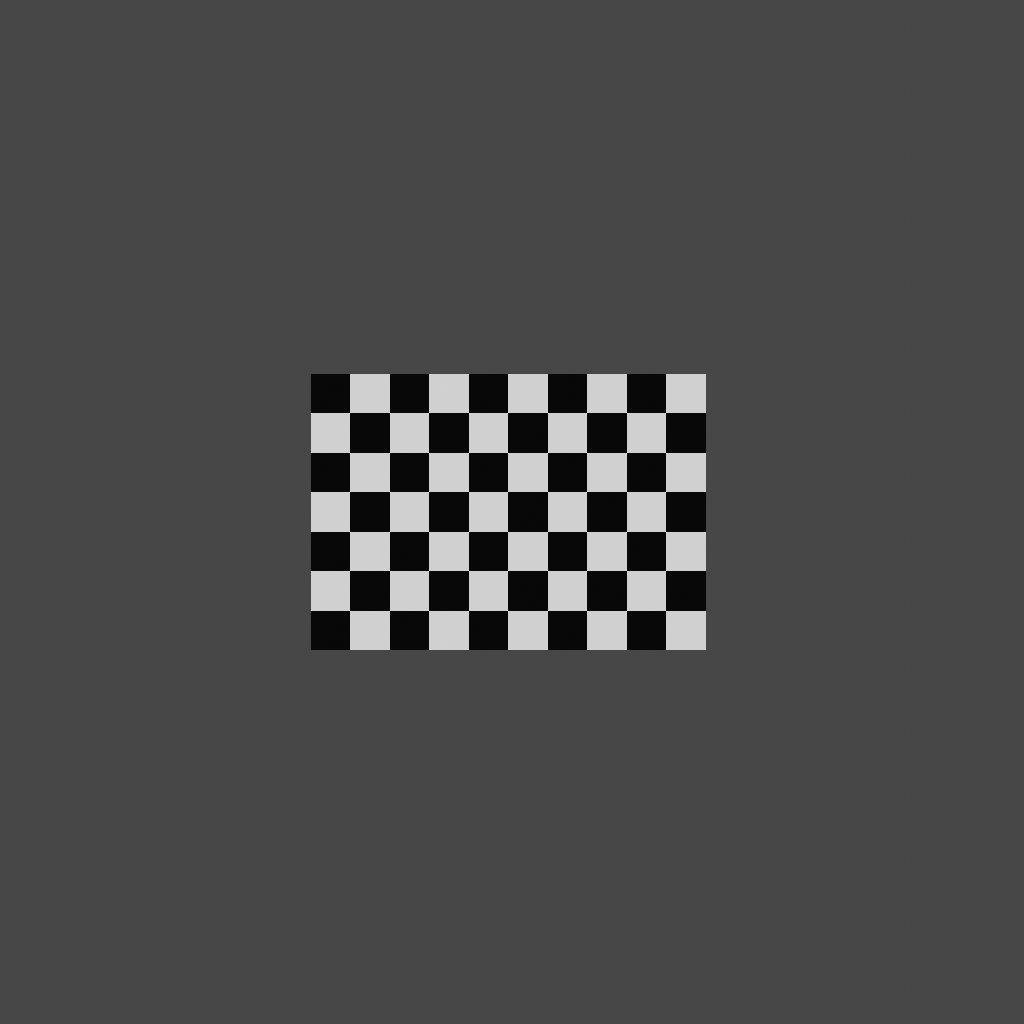

412 349
412 389
412 428
412 468
412 507
412 547
412 586
412 626
412 665
452 349
452 389
452 428
452 468
452 507
452 547
452 586
452 626
452 665
491 349
491 389
491 428
491 468
491 507
491 547
491 586
491 626
491 665
531 349
531 389
531 428
531 468
531 507
531 547
531 586
531 626
531 665
570 349
570 389
570 428
570 468
570 507
570 547
570 586
570 626
570 665
610 349
610 389
610 428
610 468
610 507
610 547
610 586
610 626
610 665


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c6.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)

In [ ]:
#6 points considered are
# (412 349)
# (452 389)
# (491 428)
# (531 468)
# (570 507)
# (610 547)
#constructing A matrix (12 x 12) matrix
#z value  = 900
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),900,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([412,349])
img_points[1]=np.array([452,389])
img_points[2]=np.array([491,428])
img_points[3]=np.array([531,468])
img_points[4]=np.array([570,507])
img_points[5]=np.array([610,547])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]

# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

Printing camera matrix:
 [[-9.38623903e-04 -2.04749810e-03  7.45659812e-01 -1.99951111e-01]
 [ 6.01409157e-01 -2.05698119e-01 -6.36496580e-07 -1.00408309e-06]
 [ 5.36513560e-04  1.10617420e-03 -1.03826491e-03 -3.23412764e-17]]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])


Factor of the given array  by Singular Value Decomposition:
[-5.67701146e-20  4.67000984e-17  1.69964116e-16 -3.29329857e-16
  1.22238871e-15 -1.17893165e-15  7.61767029e-17 -1.13078488e-15
 -7.07106781e-01  7.07106781e-01  1.45361854e-18 -8.61095582e-18]


#7th Image

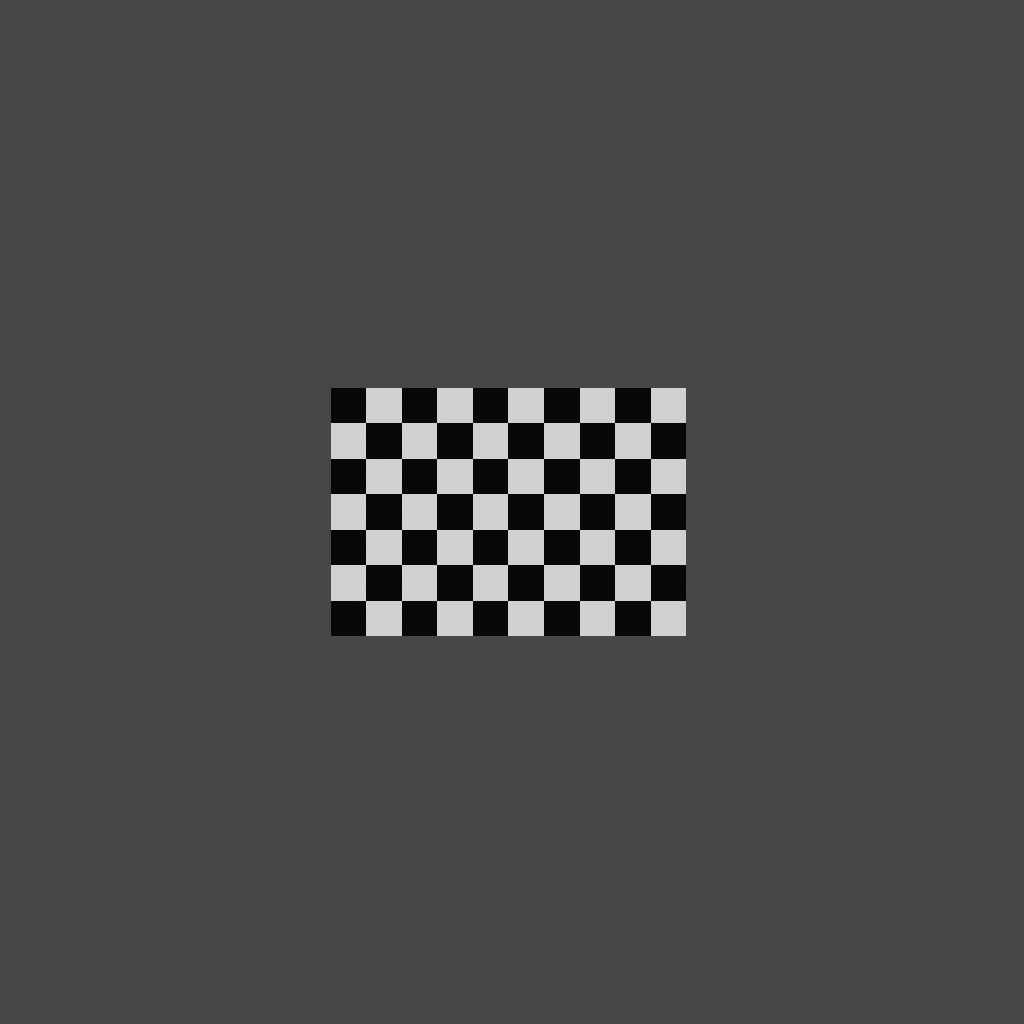

422 365
422 401
422 436
422 472
422 507
422 543
422 579
422 614
422 650
458 365
458 401
458 436
458 472
458 507
458 543
458 579
458 614
458 650
493 365
493 401
493 436
493 472
493 507
493 543
493 579
493 614
493 650
529 365
529 401
529 436
529 472
529 507
529 543
529 579
529 614
529 650
564 365
564 401
564 436
564 472
564 507
564 543
564 579
564 614
564 650
600 365
600 401
600 436
600 472
600 507
600 543
600 579
600 614
600 650


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c7.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)

In [ ]:
#6 points considered are
# (422 365)
# (458 401)
# (493 436)
# (529 472)
# (564 507)
# (600 543)
#constructing A matrix (12 x 12) matrix
#z value  = 1000
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),1000,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([422,365])
img_points[1]=np.array([458,401])
img_points[2]=np.array([493,436])
img_points[3]=np.array([529,472])
img_points[4]=np.array([564,507])
img_points[5]=np.array([600,543])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]

# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

Printing camera matrix:
 [[-9.46572496e-07+0.j -2.03557478e-06+0.j  7.42449001e-04+0.j
   1.78239477e-04+0.j]
 [ 6.07834469e-04+0.j  2.18015672e-04+0.j  4.95770491e-04+0.j
   1.25967278e-03+0.j]
 [ 9.75997031e-01+0.j  9.75997031e-01-0.j  1.14765550e-01+0.j
  -2.14356020e-15+0.j]]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A, full_matrices=False)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])


Factor of the given array  by Singular Value Decomposition:
[ 6.91955412e-06 -6.91955412e-06 -1.16608509e-06  1.16608509e-03
  1.06729500e-01 -1.06729500e-01 -9.86764946e-04  9.86764946e-01
  4.18767775e-02 -4.18767775e-02 -1.70513838e-06  1.70513838e-03]


#8th Image

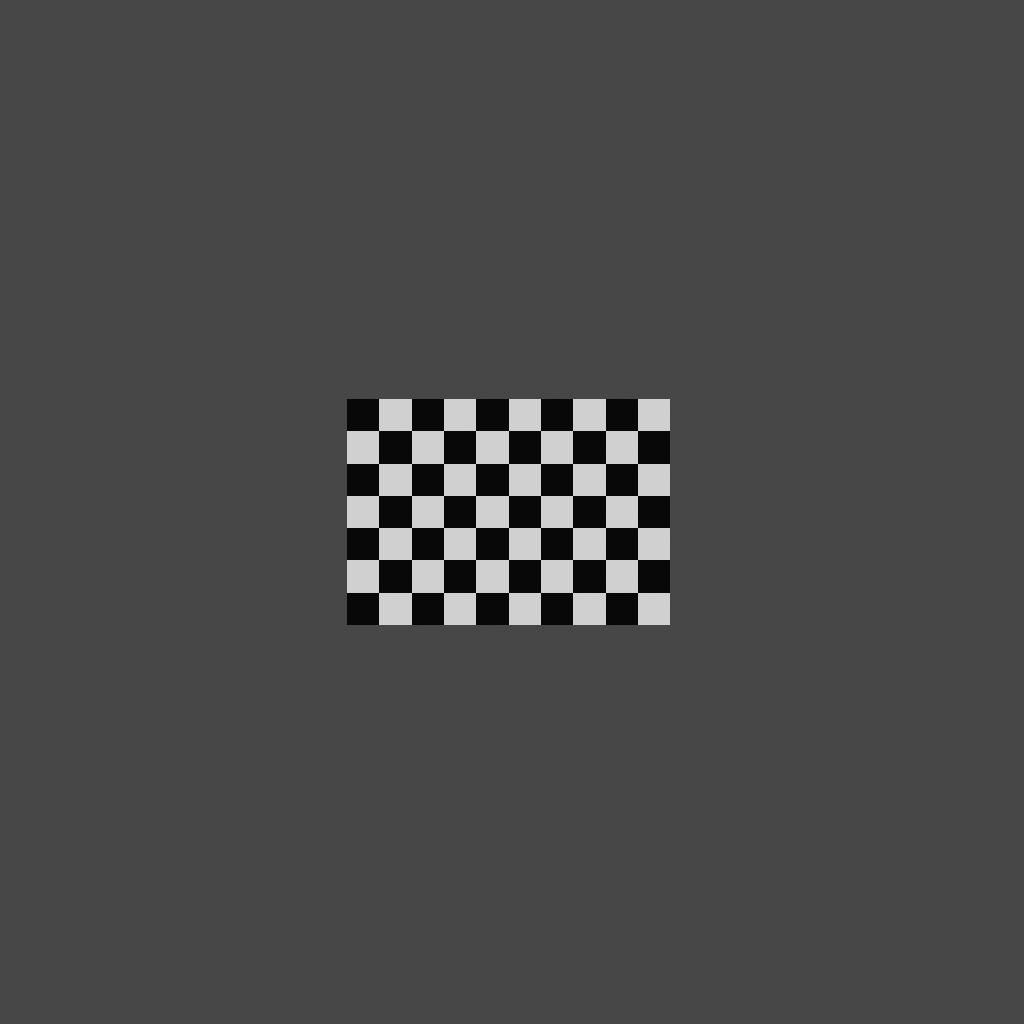

430 378
430 411
430 443
430 475
430 508
430 540
430 572
430 605
430 637
463 378
463 411
463 443
463 475
463 508
463 540
463 572
463 605
463 637
495 378
495 411
495 443
495 475
495 508
495 540
495 572
495 605
495 637
527 378
527 411
527 443
527 475
527 508
527 540
527 572
527 605
527 637
559 378
559 411
559 443
559 475
559 508
559 540
559 572
559 605
559 637
592 378
592 411
592 443
592 475
592 508
592 540
592 572
592 605
592 637


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c8.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)

In [ ]:
#6 points considered are
# (430 378)
# (463 411)
# (495 443)
# (527 475)
# (559 508)
# (592 540)
#constructing A matrix (12 x 12) matrix
#z value  = 1100
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),1100,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([430,378])
img_points[1]=np.array([463,411])
img_points[2]=np.array([495,443])
img_points[3]=np.array([527,475])
img_points[4]=np.array([559,508])
img_points[5]=np.array([592,540])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]

# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

Printing camera matrix:
 [[-8.65810245e-07 -1.84105067e-06  6.72344455e-04  1.47848262e-04]
 [ 5.56967101e-04  2.05724629e-04 -6.73253078e-04  5.66753319e-03]
 [-8.82330162e-01  9.90379907e-01 -9.52653572e-01  1.20064664e-12]]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A, full_matrices=False)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])


Factor of the given array  by Singular Value Decomposition:
[-1.62206228e-19  5.64957946e-19  5.91275646e-17 -2.09140313e-17
  1.43710763e-15 -1.41959198e-15  1.38689712e-16 -5.21038040e-14
  7.07106781e-01 -7.07106781e-01 -6.51959736e-20  8.45086615e-17]


#9th Image

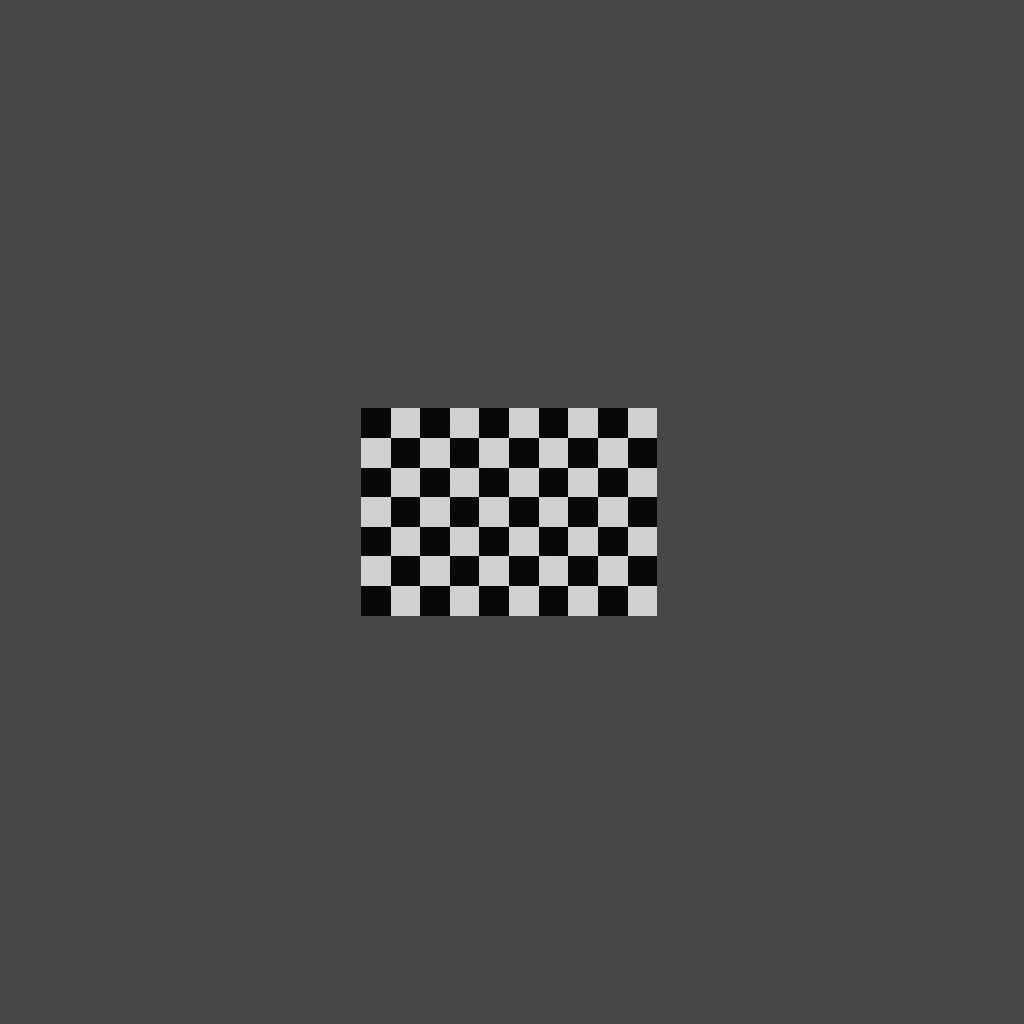

437 390
437 419
437 449
437 478
437 508
437 538
437 567
437 597
437 627
467 390
467 419
467 449
467 478
467 508
467 538
467 567
467 597
467 627
496 390
496 419
496 449
496 478
496 508
496 538
496 567
496 597
496 627
526 390
526 419
526 449
526 478
526 508
526 538
526 567
526 597
526 627
555 390
555 419
555 449
555 478
555 508
555 538
555 567
555 597
555 627
585 390
585 419
585 449
585 478
585 508
585 538
585 567
585 597
585 627


In [ ]:
from google.colab.patches import cv2_imshow
img=cv.imread('c9.png')
cv2_imshow(img)
img=img.astype(np.int32)
for i in range(1023):
  for j in range(1023):
    if( abs(img[i][j][0]-img[i][j+1][0]) > 195 and abs(img[i][j][0]-img[i+1][j][0]) > 195 ):
      print(i,j)

In [ ]:
#6 points considered are
# (437 390)
# (467 419)
# (496 449)
# (526 478)
# (555 508)
# (585 538)
#constructing A matrix (12 x 12) matrix
#z value  = 1200
# [[X1,Y1,Z1,1,0,0,0,0,-u1*X1,-u1*Y1,-u1*Z1,-u1],
#  [0,0,0,0,X1,Y1,Z1,1,-v1*X1,-v1*Y1,-v1*Z1,-v1]]

real_points=np.zeros((6,4))
for i in range(6):
  real_points[i]=np.array([25*(i+1),25*(i+1),1200,1])

img_points=np.zeros((6,2))
img_points[0]=np.array([437,390])
img_points[1]=np.array([467,419])
img_points[2]=np.array([496,449])
img_points[3]=np.array([526,478])
img_points[4]=np.array([555,508])
img_points[5]=np.array([585,538])

A=np.zeros((12,12))
for i in range(12):
  for j in range(12):
    if(i%2==0):
      if(j<4):
        A[i][j]=real_points[i//2][j]
      elif(j<8):
        A[i][j]=0
      else:
        A[i][j]=(-img_points[i//2][0])*real_points[i//2][j%4]
    else:
      if(j<4):
        A[i][j]=0
      elif(j<8):
        A[i][j]=real_points[i//2][j%4]
      else:
        A[i][j]=(-img_points[i//2][1])*real_points[i//2][j%4]

# finding eigenvalues and eigenvectors
eig_vals,eig_vectors=np.linalg.eig(np.dot(np.transpose(A),A))
eig_min=eig_vals[0] 
min_idx=0
for i in range(1,12):
  if(eig_min>eig_vals[i]):
    eig_min=eig_vals[i]
    min_idx=i
  
# printing eigen vector corresponding to minimum eigen value
print("Printing camera matrix:\n",
      (eig_vectors[min_idx]).reshape((3,4)))

Printing camera matrix:
 [[-9.56859788e-04+0.00000000e+00j -2.01519342e-03+0.00000000e+00j
   7.36984828e-01+0.00000000e+00j  1.46727687e-01+0.00000000e+00j]
 [-6.13502139e-01+0.00000000e+00j -2.42762854e-01+0.00000000e+00j
   5.85159225e-07+0.00000000e+00j -6.44767090e-07+0.00000000e+00j]
 [-8.03751149e-04+1.31508189e-10j -8.03751149e-04-1.31508189e-10j
  -5.93572798e-04+0.00000000e+00j -5.56281434e-21+0.00000000e+00j]]


In [ ]:
# Compute the factor by Singular Value 
# Decomposition
U, s, V = np.linalg.svd(A)
  
# Print the result
print("\nFactor of the given array  by Singular Value Decomposition:")
print(V[:][11])


Factor of the given array  by Singular Value Decomposition:
[-3.94218210e-20  2.70652928e-17 -3.62461317e-18  4.46273365e-17
 -3.77428160e-16  3.94346372e-16 -4.86202868e-17  1.42567611e-15
  7.07106781e-01 -7.07106781e-01  3.94242247e-19  8.74138594e-17]
